**This is Chapter 8 in the first edition, Chapter 9-10 in the second edition. There are additional problems in the first edition that I thought were worth solving.**

I starred solutions to problems I was unsure about.

### First Edition

##### 8.1 

Show that table-lookup TD($\lambda $) is a special case of general TD($\lambda $) as given by equations ((8.5)-(8.7)).

The function approximation (FA) case is a general expression of the tabular TD($\lambda$), where the TD error $\delta_t = r_{t+1} + \gamma V_t(s_{t+1}) - V_t(s_t)$ are identical in both cases, but we can express the tabular value function as $V_t(s) = \theta_{t}(s)$ where $\theta_{t}(s) \in \mathbb{R}$, to re-derive the tabular updates from 8.5-8.7. The update to the eligibility trace reduces as follows, $\vec{e}_{t} = \gamma \lambda \vec{e}_{t-1} + \nabla_{\vec{\theta}_t} V_t(s_t)  = \gamma \lambda \vec{e}_{t-1} + \nabla_{\vec{\theta}_t} \vec{\theta_t}(s_t) =  \gamma \lambda \vec{e}_{t-1} + \delta(s - s_t)  $, which is identical to the tabular case.

##### 8.2 

State aggregation is a simple form of generalizing function approximation in which states are grouped together, with one table entry (value estimate) used for each group. Whenever a state in a group is encountered, the group's entry is used to determine the state's value, and when the state is updated, the group's entry is updated. Show that this kind of state aggregation is a special case of a gradient method such as (8.4).

The state aggregation simply replaces $V_t(s_t)$ in 8.4 with a function that maps a set of states grouped into $N$ groups, to a value for each group, $S_i \rightarrow v_i \in \mathbb{R}, \forall i \in \{0, 1, \dots, N\} $.

##### 8.3*


The equations given in this section are for the on-line version of gradient-descent TD($\lambda $). What are the equations for the off-line version? Give a complete description specifying the new approximate value function at the end of an episode, $V'$, in terms of the approximate value function used during the episode, $V$. Start by modifying a forward-view equation for TD($\lambda $), such as (8.4).

I'm assuming the off-line version is just using the forward view of eligibility traces instead of the backward view. The algorithm is thus given in section 9.5 of the second edition. Given an $n$ step return, we loop through an episode for each time step $t$, let $\tau = t- n-1$. If $\tau \geq 0$,we obtain the n-step return and update Equation 8.4 accordingly. 

If the question is referring to off-policy, the off-policy implementation would be making updates to a greedy policy (as in chapter 6 & 7 of edition 1), while following an epsilon-greedy policy. 8.4 would then be $\vec{\theta_{t+1}} = \vec{\theta_t} + \alpha [R_t^\lambda - \max Q_t(s_{t+1}, a')] \nabla_{\vec{\theta_t}} Q_t(s_t, a_t) $. Given $\vec{\theta_{t+1}}$, we then have $V' = V(\vec{\theta_{t+1}})$ where $V$ is the value function at the beginning of the episode and $V'$ is the update value function. We see later in the chapter that off-policy function approximation can diverge.

##### 8.4*

For off-policy, we can show that the forward and backward views are identical along a similar line as in (7.4 1st edition). We know that for off-policy, we have the exact result that $R_t^\lambda - V_t(s_t) = \sum_{k=t}^{T-1} (\gamma \lambda)^{k-t} \delta_{t + k} $ where $\delta_{t + k} = r_{t+k} + \gamma V(s_{t_k+1}) - V_t(s_k)$ (7.4).

In addition, we know using Equation 8.7, that $e_t(s) = \sum_{k=0}^t (\gamma \lambda)^{t-k} \nabla_{\vec{\theta_t}} V_t(s_t)$ (similar to equation 7.8).

It is easy now to show that the forward and backward off-policy equations 8.4-8.7 are equivalent:

$
\begin{equation}
\begin{split}
\vec{\theta_{t+1}} =& \vec{\theta_t} + \alpha[R_t^\lambda - V_t(s_t)] \nabla_{\vec{\theta_t}} V_t(s_t) \\
=& \vec{\theta_t} + \alpha \sum_{k=t}^{T-1} (\gamma \lambda)^{k-t} \delta_k \nabla_{\vec{\theta_t}} V_t(s_t)\\
=& \vec{\theta_t} + \alpha \delta_t \sum_{k=0}^{t} (\gamma \lambda)^{t-k} \nabla_{\vec{\theta_t}} V_t(s_t)\\
=& \vec{\theta_t} + \alpha \delta_t \vec{e_t(s)}
\end{split}
\end{equation}
$

Step 2 to 3 above use the results found in Equations 7.9-7.12.



##### 8.5

How could we reproduce the tabular case within the linear framework?

The tabular case can be reproduced if $\vec{\phi_s}$ is an orthogonal basis of unit vectors over the entire state space for each $s \in S$. Each $\theta$ would then correspond exactly to a $V(s)$ when performing an inner product with $\vec{\phi_s}$ and $\vec{\theta}$.

##### 8.6 
How could we reproduce the state aggregation case (see Exercise 8.4 **should be Exercise 8.2**) within the linear framework?

One can reproduce the state aggregation case by making $\vec{\phi_s}$ an orthogonal basis on the group space instead of the entire state space.


##### 8.7

Suppose we believe that one of two state dimensions is more likely to have an effect on the value function than is the other, that generalization should be primarily across this dimension rather than along it. What kind of tilings could be used to take advantage of this prior knowledge?

A tiling that is dense in the dimension that is important, but sparse in the other dimension, would be ideal in this case.



##### 8.8**

Describe how the actor-critic control method can be combined with gradient-descent function approximation.

One example would be to make the critic $\delta_t = r_{t+1} + \gamma Q_t(s_{t+1}, a_{t+1}) - Q(s_t, a_t) $, and we update $\theta$ as usual where the traces are updated as in semi-gradient SARSA (I'm not sure about a more complicated trace update as shown in 7.7 in the first edition). The actor could also use an update as in Equation 7.14, but since we are approximation $Q(s,a)$, it might make sense to also approximate $p(s,a)$. I think we can use $\theta$ as a function approximation to $p(s,a)$, or equivalently using $Q(s,a)$ as our actor. I'm not too sure about this.

##### 8.9

Look up the paper by Baird (1995) on the Internet and obtain his counterexample for Q-learning. Implement it and demonstrate the divergence.

I only implemented the DP counter-example from the book.

In [38]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:

class DP_Baird:
    def __init__(self):
        self.alpha = 0.01
        self.epsilon = 0.01
        self.gamma = 0.99

        # x is the feature set for each state
        self.x = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [1, 2, 0, 0, 0, 0, 0],
                [1, 0, 2, 0, 0, 0, 0],
                [1, 0, 0, 2, 0, 0, 0],
                [1, 0, 0, 0, 2, 0, 0],
                [1, 0, 0, 0, 0, 2, 0],
                [2, 0, 0, 0, 0, 0, 1]
            ])

        # v is the value function, v = w * x
        self.v = np.zeros((7))
        # w is the weight for each feature in x
        self.w = np.array([1., 1., 1., 1., 1., 10., 1.])
        # delta_w is w after the gradient updated
        self.delta_w = self.w.copy()
        
    def dp_update(self):
        """
        Update V using the dynamic programming update for Baird's counterexample
        https://webdocs.cs.ualberta.ca/~sutton/book/ebook/node90.html
        """
        self.delta_w *= 0
        # the approximation of the value function is linear
        self.v = self.x.dot(self.w)

        # obtain the DP updates for w for states 1-5
        for i in range(1, 6):
            # for states 1-5, you automatically wind up in state 6
            alpha_error = self.alpha * (self.gamma * self.v[6] - self.v[i])
            self.delta_w += alpha_error * self.x[i]

        # add the transitions from state 6 to the DP updates
        for i in range(7):
            # with epsilon probability you go to the terminal state
            alpha_error1 = self.alpha * self.epsilon * (0 - self.v[6])
            # with (1 - epsilon) probability you wind up in v[6]
            alpha_error2 = self.alpha * (1 - self.epsilon) * (self.gamma * self.v[6] - self.v[6])
            self.delta_w[i] += alpha_error1 * self.x[6, i]
            self.delta_w[i] += alpha_error2 * self.x[6, i]

        self.w += self.delta_w
        return self.w.copy()



In [118]:
dp_baird = DP_Baird()

w_array = np.array([dp_baird.dp_update() for i in range(10000)])

In [129]:
for idx, w in enumerate(w_array):
    w_array[idx] = [np.log10(ww) if ww > 0 else -np.log10(-ww + 1) for ww in w]


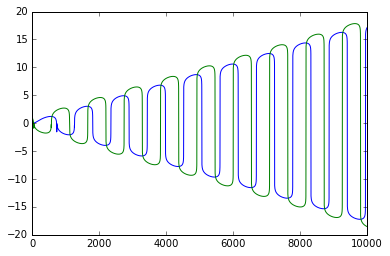

In [132]:
plt.plot(w_array[:, 6])
plt.plot(w_array[:, 5])

### Second Edition

##### 9.1 
$(N+1)^d$ since there are $N+1$ polynomial functions for each dimension $d$. Each basis function is a product of all states, thus there are $(N+1)^d$ functions.

##### 9.2

$N=2$, $c_i$ are just the exponents on state 1 and 2 for each feature.

##### 9.3

Because $N+1$ integer vectors can be assigned to each dimension $d$.

##### 9.4

Same as 8.7 above.

#### 10.1

Why have we not considered Monte Carlo methods in this chapter?

Monte Carlo methods only update state-action value functions at the end of each episode. Semi-gradient methods are necessary for tasks such as the Mountain Car example, since the episodes take a long time to end.

##### 10.2
Give pseudocode for semi-gradient one-step Expected Sarsa for control.


Similar to n-step SARSA, but:
- For each episode:
    - Initialize and store $S_0$
    - Select and store an action $A_0$, $\epsilon$-greedy wrt to $\hat{q}(S_0, \theta)$
    - For each step $t$ in episode:
        - Take action $A_t$
        - Observe and store next reward as $R_{t+1}$ and next state as $S_{t+1}$
        - $G_t \leftarrow R_{t+1} + \gamma V_{t+1} = R_{t+1} + \gamma \sum_a \pi(a|s_t) Q_{t-1}(s_t, a)$
        - $\theta \leftarrow \theta + \alpha [G_t - \hat{q}(S_t, A_t, \theta)] \nabla \hat{q}(S_t, A_t, \theta)$
        - Select and store $A_{t+1}$, $\epsilon$-greedy wrt to $\hat{q}(S_{t+1}, \theta)$

##### *11.1

Convert the equation of n-step off-policy TD (7.7) to semi-gradient
form. Give accompanying definitions of the return for both the episodic and continuing
cases.

$\theta_{t+n} = \theta_{t+n-1} + \alpha \rho^{t+n}_t[G_t^{(n)} - \hat{q}(S_t, A_t, \theta_{t+n-1})] \nabla\hat{q}(S_t, A_t, \theta_{t+n-1})$,

where $\rho_t^{t+n}$ is the importance sampling ratio ( is the relative probability under two policies of taking the n actions), and

$G_t^{(n)} = R_{t+1} + ... + \gamma^{n-1} R_{t+n} + \gamma^n \hat{q}(S_t, A_t, \theta_{t+n-1})$,  (episodic)

$G_t^{(n)} = R_{t+1} - \bar{R}_{t} + ... + R_{t+n} - \bar{R}_{t+n+1} + \hat{q}(S_t, A_t, \theta_{t+n-1})$, (continuing)

##### **11.2

Convert the equations of n-step Q(σ) (7.9, 7.13, 7.14, and 7.15)
to semi-gradient form. Give definitions that cover both the episodic and continuing
cases.

The semigradient update step would be:

$\theta_{t+n} = \theta_{t+n-1} + \alpha (1 - \sigma_{t+1} + \sigma_{t+1} \rho_{t+1}) (1 - \sigma_{t+2} + \sigma_{t+2} \rho_{t+2}) \cdot \cdot \cdot (1 - \sigma_{t+n-1} + \sigma_{t+n-1} \rho_{t+n-1}) [G_t^{(n)} - \hat{q}(S_t, A_t, \theta_{t+n-1})] \nabla\hat{q}(S_t, A_t, \theta_{t+n-1})$,

where $\rho$ is defined in 7.15, and 7.14 is the n-step return for the episodic case. For the continuing task, $\delta$ in 7.15 would need to be:

$\delta_t = R_{t+1} - \bar{R_t} + \gamma [\sigma_{t+1} Q_t(S_{t+1}, A_{t+1}) + (1 - \sigma_{t+1}V_{t+1})] - Q_{t-1}(S_t, A_t)$


